## Convolutional Layer

In [1]:
%run '../init.py'
%matplotlib inline

In [2]:
from sklearn.datasets import load_sample_image

# Return images as a 3D numpy array (width x height x color)
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")

In [42]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ..., 
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ..., 
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ..., 
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ..., 
       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ..., 
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ..., 
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ..., 
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [43]:
flower.shape

(427, 640, 3)

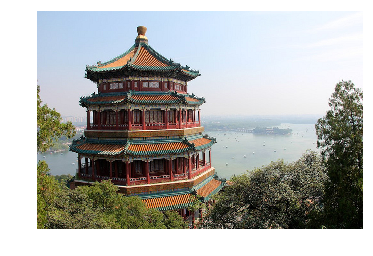

In [5]:
plot_image(china)

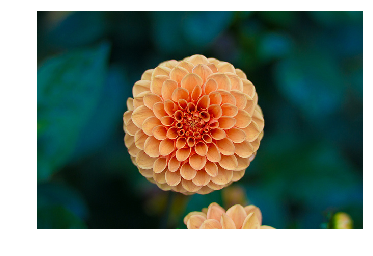

In [6]:
plot_image(flower)

In [7]:
image = china[150:220, 130:250]
height, width, channels = image.shape

In [8]:
height

70

In [9]:
width

120

In [10]:
channels

3

In [11]:
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

In [12]:
image_grayscale

array([[  50.33333206,   98.33333588,   98.66666412, ...,   90.        ,
          57.        ,   99.33333588],
       [  56.33333206,  108.33333588,   96.        , ...,   90.66666412,
          66.33333588,   68.66666412],
       [  47.66666794,  116.66666412,  105.66666412, ...,   94.        ,
          65.33333588,   64.33333588],
       ..., 
       [  20.33333397,   18.66666603,   17.66666603, ...,   19.        ,
          22.33333397,   21.33333397],
       [  14.66666698,   19.33333397,   20.        , ...,   15.        ,
          18.66666603,   18.33333397],
       [  16.        ,   15.66666698,   24.        , ...,   20.33333397,
          14.        ,   17.66666603]], dtype=float32)

In [13]:
images

array([[[[  50.33333206],
         [  98.33333588],
         [  98.66666412],
         ..., 
         [  90.        ],
         [  57.        ],
         [  99.33333588]],

        [[  56.33333206],
         [ 108.33333588],
         [  96.        ],
         ..., 
         [  90.66666412],
         [  66.33333588],
         [  68.66666412]],

        [[  47.66666794],
         [ 116.66666412],
         [ 105.66666412],
         ..., 
         [  94.        ],
         [  65.33333588],
         [  64.33333588]],

        ..., 
        [[  20.33333397],
         [  18.66666603],
         [  17.66666603],
         ..., 
         [  19.        ],
         [  22.33333397],
         [  21.33333397]],

        [[  14.66666698],
         [  19.33333397],
         [  20.        ],
         ..., 
         [  15.        ],
         [  18.66666603],
         [  18.33333397]],

        [[  16.        ],
         [  15.66666698],
         [  24.        ],
         ..., 
         [  20.33333397],
  

In [14]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0 ,1] = 1

In [15]:
fmap

array([[[[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 1.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]]],


       [[[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 1.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]]],


       [[[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 1.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]]],


       [[[ 0.,  1.]],

        [[ 0.,  1.]],

        [[ 0.,  1.]],

        [[ 1.,  1.]],

        [[ 0.,  1.]],

        [[ 0.,  1.]],

        [[ 0.,  1.]]],


       [[[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 1.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]]],


       [[[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 1.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]],

        [[ 0.,  0.]]],


       [[[ 0.,  0.]],


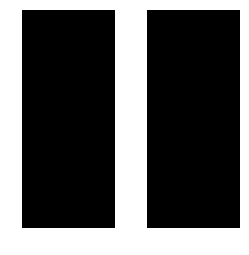

In [16]:
plot_image(fmap[:, :, 0, 0])
plt.show()

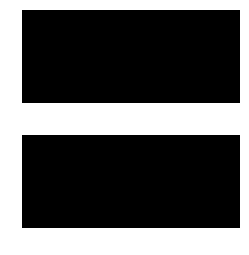

In [17]:
plot_image(fmap[:, :, 0, 1])
plt.show()

In [18]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [19]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

Original image:


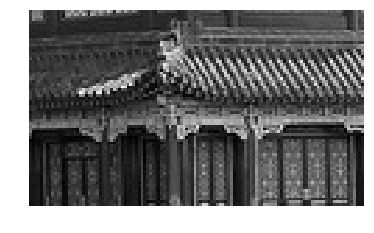

In [20]:
print("Original image:")
plot_image(images[0, :, :, 0])
plt.show()

Vertical edges detector:


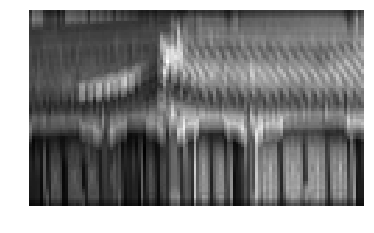

In [21]:
print("Vertical edges detector:")
plot_image(output[0, :, :, 0])
plt.show()

Horizontal edges detector:


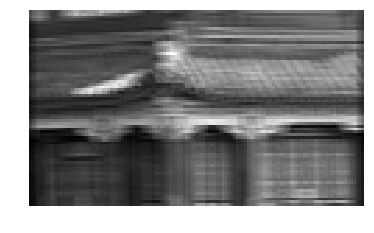

In [22]:
print("Horizontal edges detector:")
plot_image(output[0, :, :, 1])
plt.show()

#### Using tf.nn.conv2d()

In [23]:
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape

In [24]:
batch_size

2

In [25]:
height

427

In [26]:
width

640

In [27]:
channels

3

In [28]:
# Create filters (vertical and horizontal)
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# Vertical line
filters[:, 3, :, 0] = 1
# Horizontal line
filters[3, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

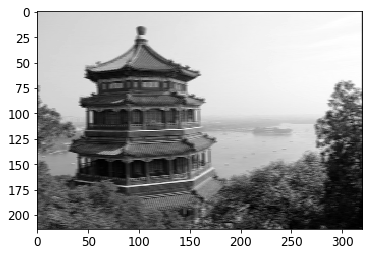

In [29]:
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

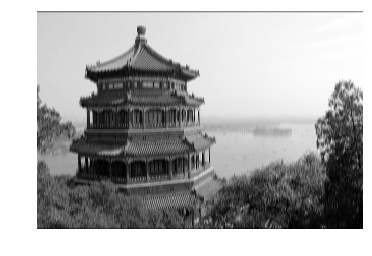

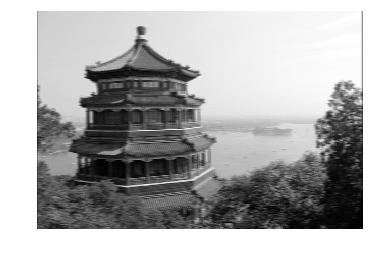

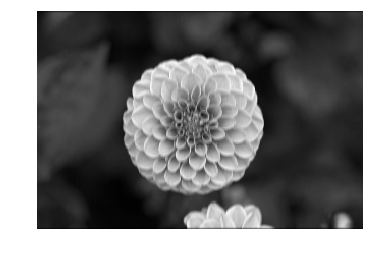

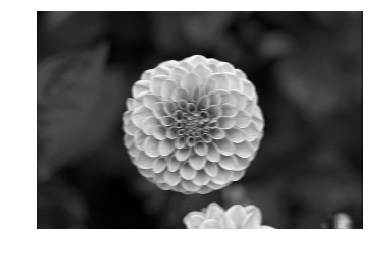

In [30]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

#### Using tf.layers.conv2d()

In [31]:
reset_graph()

X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)
conv = tf.layers.conv2d(X, filters=2, kernel_size=7, strides=[2,2], padding="SAME")

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    output = sess.run(conv, feed_dict={X: dataset})

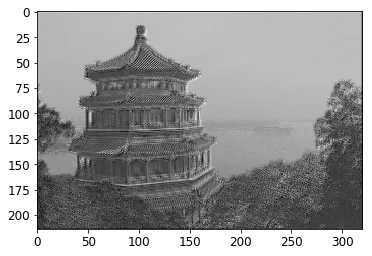

In [32]:
plt.imshow(output[0, :, :, 1], cmap="gray")
plt.show()

#### VALID and SAME padding